In [1]:
from pyDOE import pbdesign, ff2n, fracfact
from itertools import combinations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from typing import NamedTuple, List, Dict, Tuple, Any

---
## Def internal func.
- common func.
    - f_params
    - interact
    - viz_doe
    - viz_interact
- specialized func.
    - pbd
    - yamanaka
    - cff

In [2]:
def interact(df:pd.core.frame.DataFrame, n:int):
    f = df.shape[1]
    _list = [list(combinations(df.columns, i)) for i in range(2, n+1)]
    df_intact = [df]+[
        pd.DataFrame(
            np.array(
                [df.loc[:, v[i][0]] * df.loc[:, v[i][1]] for i in range(len(v))]
            ).T,
            index = df.index,
            columns = [f"{'_'.join(v[i])}" for i in range(len(v))]
        ) for v in _list]
    df_res = pd.concat(df_intact, axis=1).corr().abs()
    return df_res

In [3]:
def f_params(f:[int, list, np.ndarray, pd.core.indexes.base.Index]):
    if type(f) == int:
        l_f = [f"X{i+1}" for i in range(f)] 
        n_f = f
    elif type(f) == list or np.ndarray or pd.core.indexes.base.Index:
        l_f = f
        n_f = len(f)
    else:
        l_f, n_f = None, None
    return l_f, n_f

In [4]:
def viz_doe(df:pd.core.frame.DataFrame, figsize:tuple = (5, 4)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(df, vmin=-1, vmax=1, ax=ax)

In [5]:
def viz_interact(df:pd.core.frame.DataFrame, figsize:tuple = (5, 4)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(df, cmap="bwr", vmin=0, vmax=1, ax=ax)

In [6]:
def pbd(l_f:list, n_f:int, p_e:str):
    _df = pd.DataFrame(pbdesign(n_f))
    _df.index = [f"{p_e}{i+1}" for i in range(_df.shape[0])]
    _df.columns = l_f
    return _df

In [7]:
def yamanaka(l_f:list, n_f:int, p_e:str):
    _list = [1 for i in range(n_f)]
    _df = pd.DataFrame(
        np.array([_list[0:i]+[-1]+_list[i:] for i in range(n_f)]).T,
        index = [f"{p_e}{i+1}" for i in range(len(_list)+1)],
        columns = l_f
    )
    return _df

In [8]:
def cff(l_f:list, n_f:int, p_e:str):
    _df = pd.DataFrame(ff2n(n_f))
    _df.index = [f"{p_e}{i+1}" for i in range(_df.shape[0])]
    _df.columns = l_f
    return _df

---
## Describe class

In [9]:
class PlacketBurman():
    res_doe = None
    def __init__(self):
        None
        
    def doe(
        self,
        factor:[int, list, np.ndarray, pd.core.indexes.base.Index],
        preffix:str = "exp_",
        viz:bool = False,
        figsize:tuple = (5, 4)
    ):
        l_f, n_f = f_params(f=factor)
        _df = pbd(l_f, n_f, preffix)
        self.res_doe = _df
        if viz:
            return viz_doe(_df, figsize=figsize)
        else:
            return _df
    
    def interact(self, dim:int = 1, viz:bool = False, figsize:tuple = (5, 4)):
        _df = interact(self.res_doe, dim)
        if viz:
            return viz_interact(_df, figsize=figsize)
        else:
            return _df

In [10]:
class Yamanaka():
    res_doe = None
    def __init__(self):
        None
        
    def doe(
        self,
        factor:[int, list, np.ndarray, pd.core.indexes.base.Index],
        preffix:str = "exp_",
        viz:bool = False,
        figsize:tuple = (5, 4)
    ):
        l_f, n_f = f_params(f=factor)
        _df = yamanaka(l_f, n_f, preffix)
        self.res_doe = _df
        if viz:
            return viz_doe(_df, figsize=figsize)
        else:
            return _df
    
    def interact(self, dim:int = 1, viz:bool = False, figsize:tuple = (5, 4)):
        _df = interact(self.res_doe, dim)
        if viz:
            return viz_interact(_df, figsize=figsize)
        else:
            return _df

In [11]:
class CatFullFact():
    res_doe = None
    def __init__(self):
        None
        
    def doe(
        self,
        factor:[int, list, np.ndarray, pd.core.indexes.base.Index],
        preffix:str = "exp_",
        viz:bool = False,
        figsize:tuple = (5, 4)
    ):
        l_f, n_f = f_params(f=factor)
        _df = cff(l_f, n_f, preffix)
        self.res_doe = _df
        if viz:
            return viz_doe(_df, figsize=figsize)
        else:
            return _df
    
    def interact(self, dim:int = 1, viz:bool = False, figsize:tuple = (5, 4)):
        _df = interact(self.res_doe, dim)
        if viz:
            return viz_interact(_df, figsize=figsize)
        else:
            return _df

---

In [12]:
genes = [
    "SOX1", "SOX2", "SOX3", "NES",
    "EOMES", "OCT4", "KLF4", "MYC"
]

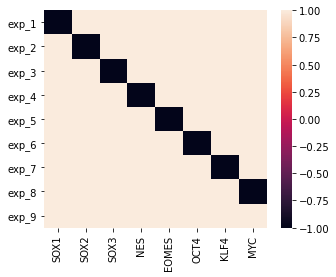

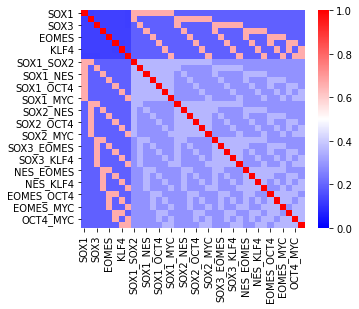

In [13]:
moge = Yamanaka()
moge.doe(factor = genes, viz=True)
moge.interact(dim = 2, viz=True)

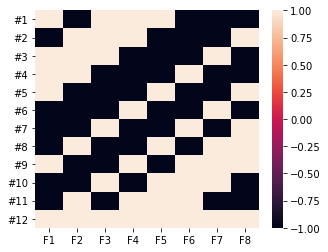

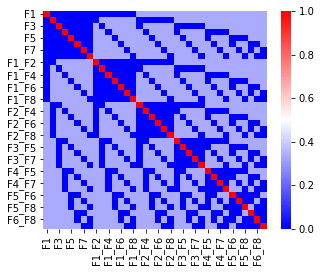

In [16]:
hoge = PlacketBurman()
hoge.doe(factor = [f"F{i+1}" for i in range(8)], preffix="#", viz=True)
hoge.interact(dim = 2, viz=True)

In [24]:
hoge = PlacketBurman()
hoge.doe(factor = 13, preffix="#", viz=False).to_csv("./pb_13.csv")

In [17]:
noge = CatFullFact()
noge.doe(factor = genes, viz=True, preffix="", figsize=(6, 5))
noge.interact(dim=2, viz=True)

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

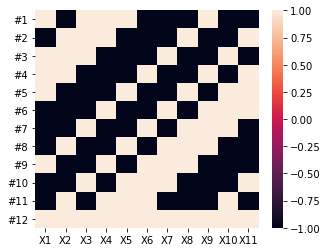

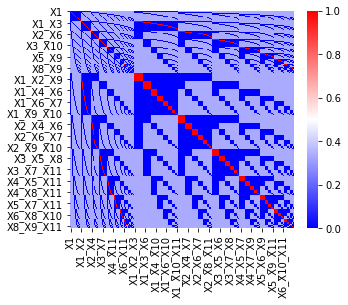

In [18]:
model = PlacketBurman()
model.doe(11, "#", True)
model.interact(3, True)

In [21]:
hoge1 = pd.DataFrame(fracfact(2))

TypeError: expected string or bytes-like object

In [19]:
hoge1 = pd.DataFrame(fracfact("A B C"))
hoge = pd.DataFrame(
    hoge1.iloc[:, 0].values,
    index = [f"exp{i+1}" for i in range(hoge.shape[0])],
    columns = ["A"]
)

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [68]:
hoge = np.array([hoge1.iloc[:, 0].values])
moge = np.array([hoge1.iloc[:, 1].values])
hoge.T@moge

array([[ 1.,  1., -1., -1.,  1.,  1., -1., -1.],
       [-1., -1.,  1.,  1., -1., -1.,  1.,  1.],
       [ 1.,  1., -1., -1.,  1.,  1., -1., -1.],
       [-1., -1.,  1.,  1., -1., -1.,  1.,  1.],
       [ 1.,  1., -1., -1.,  1.,  1., -1., -1.],
       [-1., -1.,  1.,  1., -1., -1.,  1.,  1.],
       [ 1.,  1., -1., -1.,  1.,  1., -1., -1.],
       [-1., -1.,  1.,  1., -1., -1.,  1.,  1.]])

In [73]:
fracfact("A B C D E").shape

(32, 5)

In [64]:
fracfact("A B C")

array([[-1., -1., -1.],
       [ 1., -1., -1.],
       [-1.,  1., -1.],
       [ 1.,  1., -1.],
       [-1., -1.,  1.],
       [ 1., -1.,  1.],
       [-1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [32]:
fracfact("A B C AB AC BC ABC")

array([[-1., -1., -1.,  1.,  1.,  1., -1.],
       [ 1., -1., -1., -1., -1.,  1.,  1.],
       [-1.,  1., -1., -1.,  1., -1.,  1.],
       [ 1.,  1., -1.,  1., -1., -1., -1.],
       [-1., -1.,  1.,  1., -1., -1.,  1.],
       [ 1., -1.,  1., -1.,  1., -1., -1.],
       [-1.,  1.,  1., -1., -1.,  1., -1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [7]:
n_factors = 23
n_dummy = 0
f = n_factors+n_dummy

In [9]:
_temp =temp

In [10]:
temp = [-2*(i%2)+1 for i in range(2*(f))]+[0]
df = pd.DataFrame(
    np.array([_temp[0:2*i]+[0, 0]+_temp[2*i:] for i in range(f)]).T,
    index = [f"exp_{i+1}" for i in range(len(_temp)+2)],
    columns = [f"X{i+1}" for i in range(f)]
).iloc[:, :n_factors]

<AxesSubplot:>

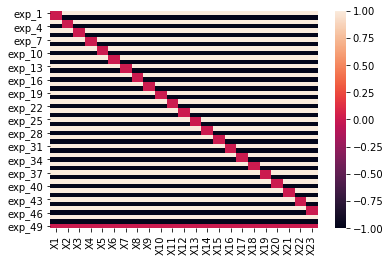

In [13]:
sns.heatmap(df)

<AxesSubplot:>

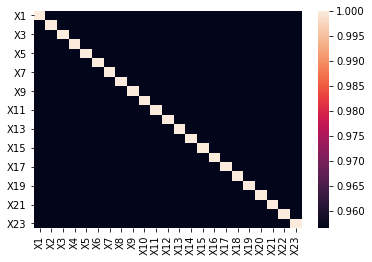

In [11]:
sns.heatmap(df.corr())

In [14]:
len(list(combinations([f"X{i+1}" for i in range(f)], 2)))

253

In [15]:
honya = _temp[0:0].extend([0, 0])

In [16]:
_temp[0:0].extend([0, 0])

In [126]:
np.array([_temp[0:2*i]+[0, 0]+_temp[2*i:] for i in range(f)]).T

array([[ 0,  1,  1,  1,  1],
       [ 0, -1, -1, -1, -1],
       [ 1,  0,  1,  1,  1],
       [-1,  0, -1, -1, -1],
       [ 1,  1,  0,  1,  1],
       [-1, -1,  0, -1, -1],
       [ 1,  1,  1,  0,  1],
       [-1, -1, -1,  0, -1],
       [ 1,  1,  1,  1,  0],
       [-1, -1, -1, -1,  0],
       [ 1,  1,  1,  1,  1]])